<a href="https://colab.research.google.com/github/Kvaathe/AAMD/blob/main/Trabajo2/Daniel_Carrasco_Perez_Trabajo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Debido a problemas con los certificados en Mac, deben añadirse las dos líneas siguientes para importar correctamente ficheros de forma segura.

In [ ]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

Cargamos las librerías necesarias:

In [1]:
from pandas import read_csv
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import pydotplus
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import math
import seaborn as sns

Cargamos el dataset:

In [2]:
url = "https://raw.githubusercontent.com/Kvaathe/AAMD/main/Trabajo2/Admission_Predict.csv"
#url = "https://raw.githubusercontent.com/Kvaathe/AAMD/main/Trabajo2/Admission_Predict_Ver1.1.csv"

In [3]:
dataset = pd.read_csv(url)

In [4]:
print(dataset)

     Serial No.  GRE Score  TOEFL Score  ...  CGPA  Research  Chance of Admit 
0             1        337          118  ...  9.65         1              0.92
1             2        324          107  ...  8.87         1              0.76
2             3        316          104  ...  8.00         1              0.72
3             4        322          110  ...  8.67         1              0.80
4             5        314          103  ...  8.21         0              0.65
..          ...        ...          ...  ...   ...       ...               ...
395         396        324          110  ...  9.04         1              0.82
396         397        325          107  ...  9.11         1              0.84
397         398        330          116  ...  9.45         1              0.91
398         399        312          103  ...  8.78         0              0.67
399         400        333          117  ...  9.66         1              0.95

[400 rows x 9 columns]


Como se muestra a continuación, no hay ningún valor nulo en los datos de estudio.

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [8]:
dataset.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


Con el heatmap, se puede ver la correlación entre las variables de estudio.

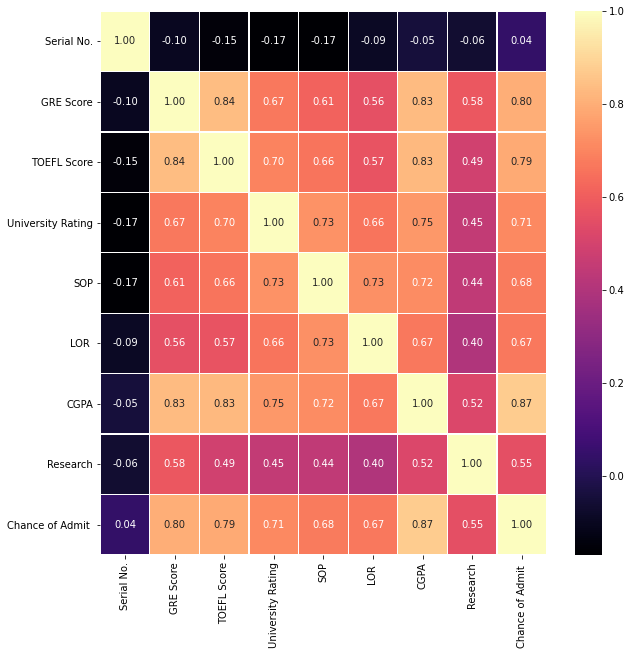

In [9]:
plt.figure(figsize = (10,10))
sns.heatmap(dataset.corr(),annot=True,linewidths =0.10,fmt = '.2f',cmap='magma')

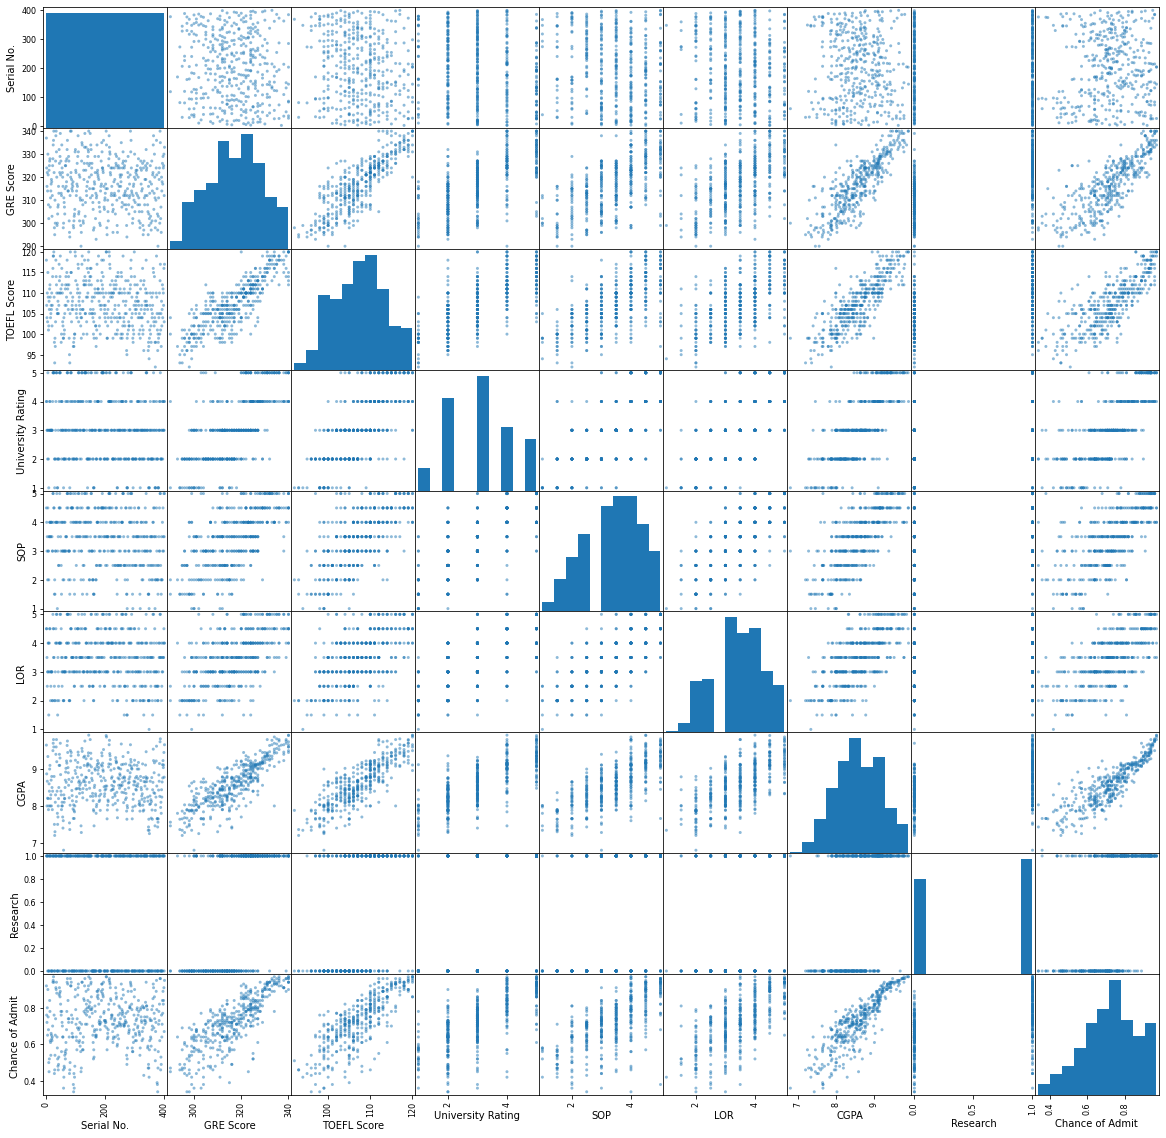

In [10]:
scatter_matrix(dataset, figsize=(20,20))
pyplot.show()

Nos desacemos de la variable Serial No. por no ser útil para el estudio.

In [11]:
dataset.drop('Serial No.',axis=1,inplace=True)

Ahora discretizamos la clase Chance of Admit y las variables SOP, LOR y CGPA.

In [12]:
datos = dataset.iloc[:,-1:]
for x in range(len(datos)):
  if datos.iloc[x, 0] >= 0.60:
    datos.iloc[x, 0] = 'Yes'
  else:
    datos.iloc[x, 0] = 'No'
dataset.iloc[:,-1:] = datos
print(dataset)

     GRE Score  TOEFL Score  University Rating  ...  CGPA  Research  Chance of Admit 
0          337          118                  4  ...  9.65         1               Yes
1          324          107                  4  ...  8.87         1               Yes
2          316          104                  3  ...  8.00         1               Yes
3          322          110                  3  ...  8.67         1               Yes
4          314          103                  2  ...  8.21         0               Yes
..         ...          ...                ...  ...   ...       ...               ...
395        324          110                  3  ...  9.04         1               Yes
396        325          107                  3  ...  9.11         1               Yes
397        330          116                  4  ...  9.45         1               Yes
398        312          103                  3  ...  8.78         0               Yes
399        333          117                  4  ...  9

In [13]:
dataset.SOP = dataset.SOP.astype(int)
dataset.iloc[:,4] = dataset.iloc[:,4].astype(int)
dataset.CGPA = dataset.CGPA.astype(int)

Dividimos el dataset en 80% de datos para entrenar y 20% para test:

In [14]:
array = dataset.values
X = array[:,0:7]
y = array[:,7]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)

Realizamos predicciones con el dataset de validación:

In [15]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

Damos detalles sobre el modelo:

In [16]:
print(model)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


Evaluamos las predicciones, en primer lugar la precisión obtenida:

In [17]:
print(accuracy_score(Y_validation, predictions))

0.875


Ahora la matriz de confusión:

In [18]:
print(confusion_matrix(Y_validation, predictions))

[[12  6]
 [ 4 58]]


Un informe de clasificación:

In [19]:
print(classification_report(Y_validation, predictions))

              precision    recall  f1-score   support

          No       0.75      0.67      0.71        18
         Yes       0.91      0.94      0.92        62

    accuracy                           0.88        80
   macro avg       0.83      0.80      0.81        80
weighted avg       0.87      0.88      0.87        80



Predicciones de ejemplo:

In [20]:
print(model.predict([[337,	118,	4,	4,	4,	9,	1]]), dataset.iloc[0,-1])
print(model.predict([[324,	107,	4,	4,	4,	8,	1]]), dataset.iloc[1,-1])
print(model.predict([[316,	104,	3,	3,	3,	8,	1]]), dataset.iloc[2,-1])
print(model.predict([[322,	110,	3,	3,	2,	8,	1]]), dataset.iloc[3,-1])
print(model.predict([[314,	103,	2,	2,	3,	8,	0]]), dataset.iloc[4,-1])
print(model.predict([[308,	101,	2,	3,	4,	7,	0]]), dataset.iloc[5,-1])
print(model.predict([[302,	102,	1,	2,	1,	8,	0]]), dataset.iloc[8,-1])

['Yes'] Yes
['Yes'] Yes
['Yes'] Yes
['Yes'] Yes
['Yes'] Yes
['Yes'] Yes
['No'] No


Dibujamos el árbol:

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


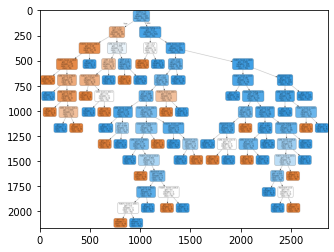

In [21]:
from sklearn.externals.six import StringIO
import graphviz

data = tree.export_graphviz(model, out_file=None, feature_names=dataset.columns.values[0:7], class_names=["No", "Yes"], filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

img = pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()

[Text(1164.2884615384614, 1572.5571428571427, 'X[5] <= 7.5\ngini = 0.285\nsamples = 320\nvalue = [55, 265]'),
 Text(558.0, 1456.0714285714284, 'X[4] <= 2.5\ngini = 0.39\nsamples = 49\nvalue = [36, 13]'),
 Text(257.53846153846155, 1339.5857142857142, 'X[1] <= 106.0\ngini = 0.18\nsamples = 30\nvalue = [27, 3]'),
 Text(171.69230769230768, 1223.1, 'X[1] <= 100.5\ngini = 0.128\nsamples = 29\nvalue = [27, 2]'),
 Text(85.84615384615384, 1106.6142857142856, 'gini = 0.0\nsamples = 21\nvalue = [21, 0]'),
 Text(257.53846153846155, 1106.6142857142856, 'X[0] <= 296.5\ngini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(171.69230769230768, 990.1285714285714, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(343.38461538461536, 990.1285714285714, 'X[0] <= 309.0\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(257.53846153846155, 873.6428571428571, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(429.23076923076917, 873.6428571428571, 'X[0] <= 314.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Te

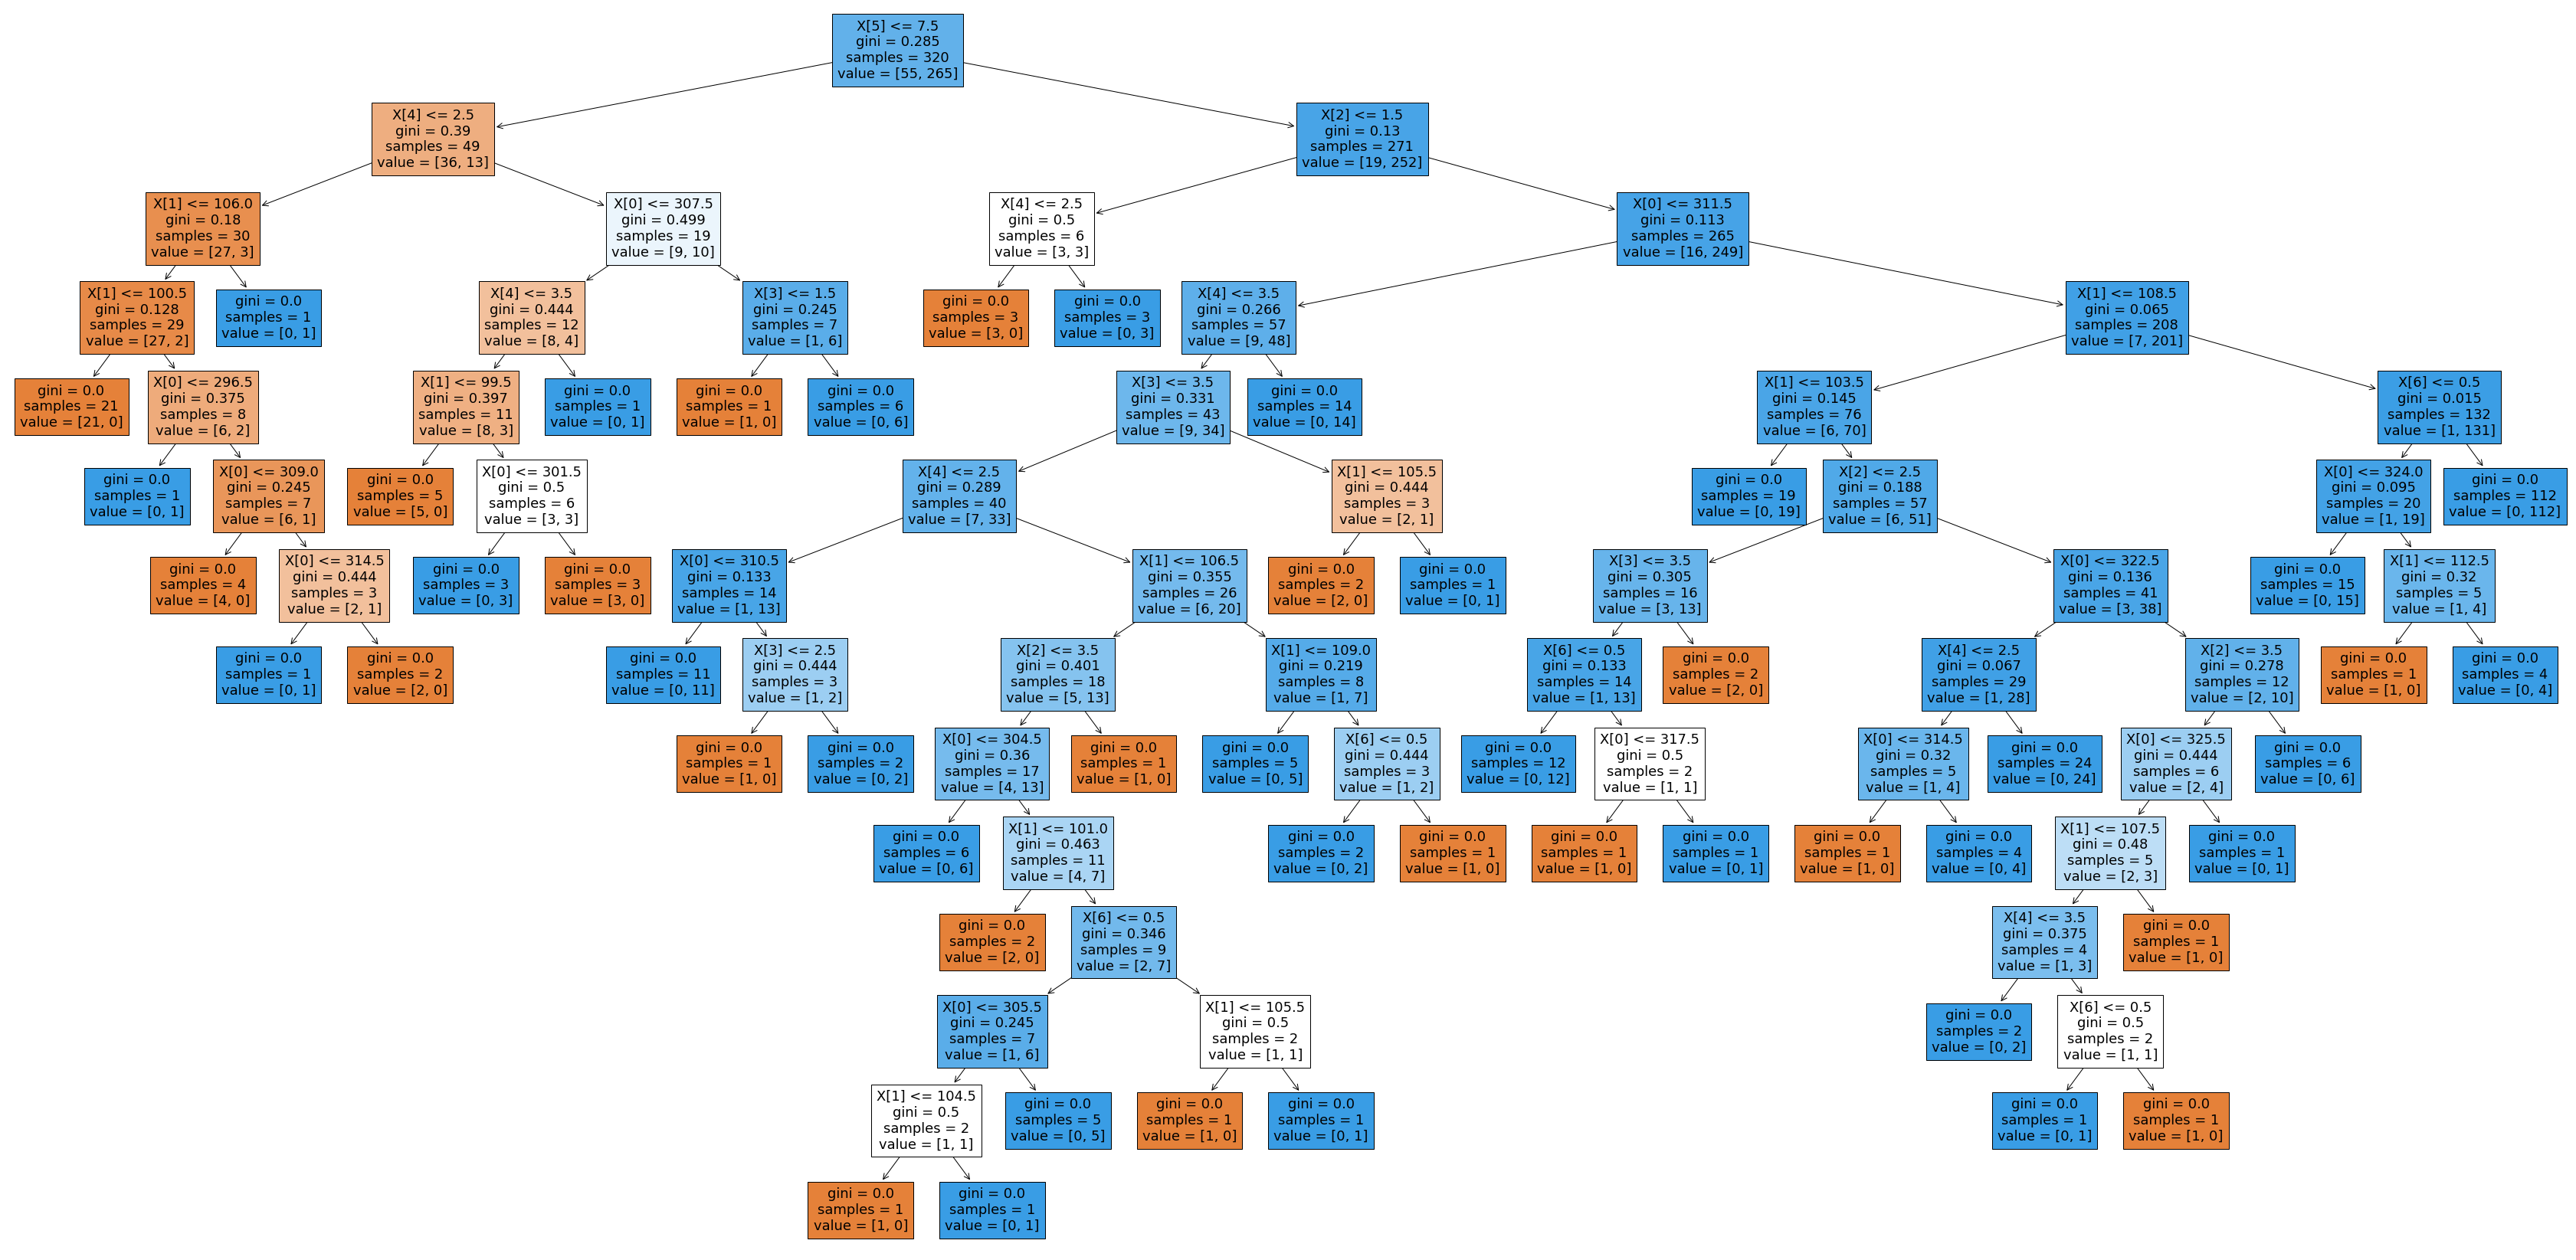

In [22]:
from sklearn.tree import plot_tree
plt.figure(figsize=(60,30))
plot_tree(model, filled=True)